In [2]:
%matplotlib inline
import os
import glob
import pylab
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5)
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.colors
from matplotlib.dates import date2num
from datetime import datetime

from pysurvey.plot import setup_sns as setup
from pysurvey.plot import minmax, icolorbar, density, legend, text, dateticks

In [4]:
# df = pd.read_csv('/Users/ajmendez/data/reddit/subreddit_numbers.csv')
df = pd.read_csv('/Users/ajmendez/data/reddit/subreddit_numbers_v1.csv')

,Unnamed: 0,subreddit,year,bin,count,nauthor,ntotal,nunique,nyear,ngoodyear
0,0,zyzz,2014,1980,1,1,4,3,2,0
1,1,zyzz,2014,2000,1,15,4,3,2,0
...,...,...,...,...,...,...,...,...,...,...
126172,126172,bugs,2007,2020,1,1,1,1,7,0
126173,126173,ads,2007,2000,1,1,1,1,8,5


# Feature Building

* ntotal / nunique all for simple filtering to "good" data where there is enough data points to make some assessment of the ages


In [14]:
# Update the unique, and totals for simple filtering.
df['ntotal'] = df['nunique'] = 0

for (subreddit, year), d in df.groupby(['subreddit', 'year']):
    isgood = (df['subreddit'] == subreddit) & (df['year'] == year)
    df.loc[isgood, ['ntotal', 'nunique']]  = np.sum(d['count']), len(d)

In [105]:
df['nyear'] = 0
for subreddit, d in df.groupby('subreddit'):
    isgood = (df['subreddit'] == subreddit)
    df.loc[isgood, 'nyear'] = len(np.unique(d['year']))
#     y = d[(d['nunique'] > 3) & (d['ntotal'] > 10)].groupby('year')
#     df.loc[isgood, ['nyear', 'ngoodyear']] = [len(np.unique(d['year'])), len(y)]

In [29]:
df['ngoodyear'] = 0
isgood = (df['ntotal'] > 10) & (df['nunique'] > 5)
for subreddit,d in df[isgood].groupby('subreddit'):
    df.loc[isgood & (df['subreddit'] == subreddit), 'ngoodyear'] = len(np.unique(d['year']))

In [113]:
df.to_csv('/Users/ajmendez/data/reddit/subreddit_numbers_v1.csv')

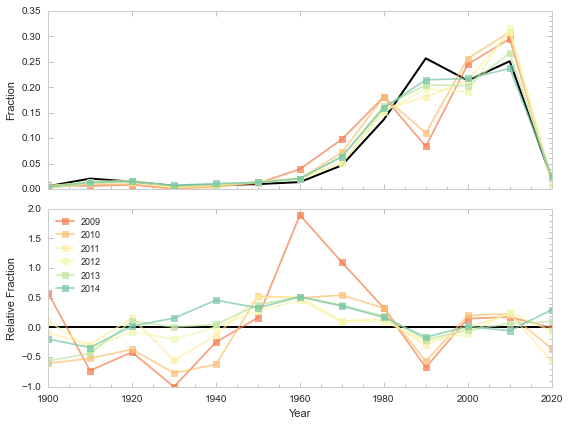

In [71]:
yearnorm = matplotlib.colors.Normalize(2007,2016)
bins = np.arange(1900, 2031, 10)

V,L = np.histogram(df['bin'], bins=bins, weights=df['count'])
setup(figsize=(8,6))
for k,(year, d) in enumerate(numbers.groupby('year'),1):
    ax = setup(subplt=(2,1,1), xlabel='Year', ylabel='Fraction', xticks=False)
    if k == 1:
        pylab.plot(L[:-1], V*1.0/np.sum(V), lw=2, color='k')

    v,l = np.histogram(d['bin'], bins=bins, weights=d['count'])
    pylab.plot(l[:-1], v*1.0/np.sum(v),  '-s', alpha=0.7,
                   color=pylab.cm.Spectral(yearnorm(year)), label=year)
    ax = setup(subplt=(2,1,2), xlabel='Year', ylabel='Relative Fraction')
    if k == 1:
        pylab.axhline(0, color='k', lw=2)
    pylab.plot(l[:-1], v*1.0/np.sum(v) / (V*1.0 / np.sum(V)) - 1,  '-s', alpha=0.7, 
                   color=pylab.cm.Spectral(yearnorm(year)), label=year)
    
legend(loc=2)
pylab.tight_layout()

2007
2008
2009
2010
2011
2012
2013
2014


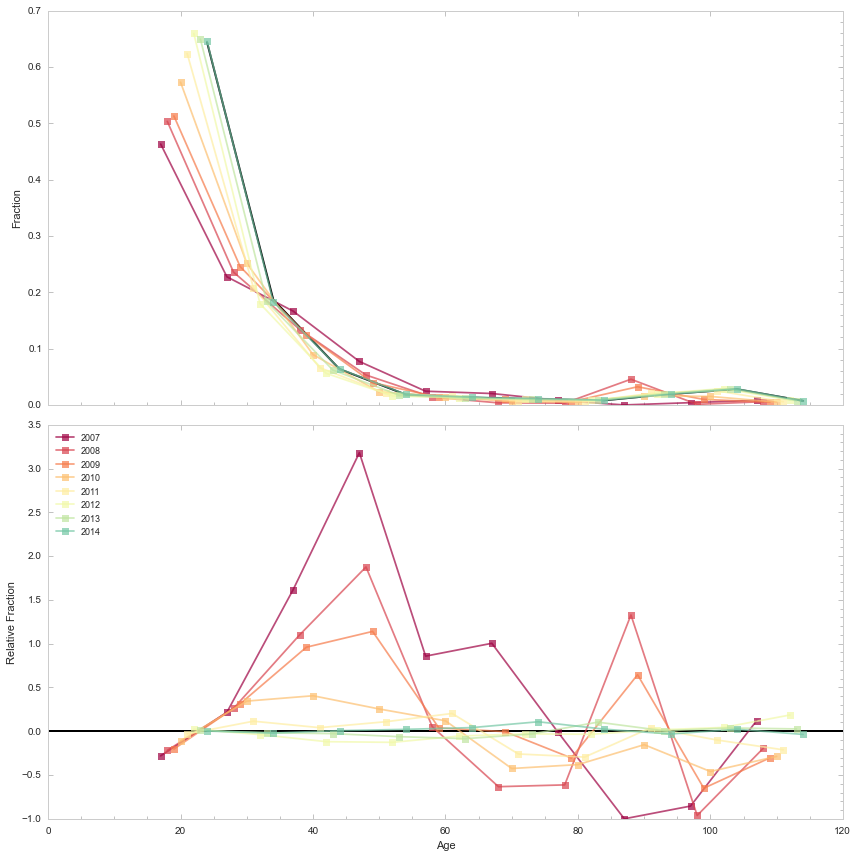

In [76]:
## yearnorm = matplotlib.colors.Normalize(2007,2016)
bins = np.arange(1900, 2006, 10)

V,L = np.histogram(df['bin'], bins=bins, weights=df['count'])
setup(figsize=(12,12))
for k,(year, d) in enumerate(df.groupby('year'),1):
    print year
    ax = setup(subplt=(2,1,1), xlabel='Age', ylabel='Fraction', xticks=False)
    if k == 1:
        pylab.plot(2014-L[:-1], V*1.0/np.sum(V), lw=2, color='k')

    v,l = np.histogram(d['bin'], bins=bins, weights=d['count'])
    pylab.plot(year-l[:-1], v*1.0/np.sum(v),  '-s', alpha=0.7,
                   color=pylab.cm.Spectral(yearnorm(year)), label=year)
    ax = setup(subplt=(2,1,2), xlabel='Age', ylabel='Relative Fraction')
    if k == 1:
        pylab.axhline(0, color='k', lw=2)
    pylab.plot(year-l[:-1], v*1.0/np.sum(v) / (V*1.0 / np.sum(V)) - 1,  '-s', alpha=0.7, 
                   color=pylab.cm.Spectral(yearnorm(year)), label=year)
    
legend(loc=2)
pylab.tight_layout()

In [66]:
# numbers = df[(df['nyear'] > 7)] # too much noise
numbers = df[ (df['ntotal'] > 100) & (df['nunique'] > 10) & (df['ngoodyear'] > 7)]


tmp = np.unique(numbers['subreddit'])
print tmp, len(tmp)
numbers

['politics' 'programming' 'science'] 3


,Unnamed: 0,subreddit,year,bin,count,nauthor,ntotal,nunique,nyear,ngoodyear
6535,6535,science,2014,1900,5,27,1157,13,8,8
6536,6536,science,2014,1910,16,24,1157,13,8,8
...,...,...,...,...,...,...,...,...,...,...
124569,124569,politics,2009,2010,106,822,359,12,8,8
124570,124570,politics,2009,2020,7,151,359,12,8,8


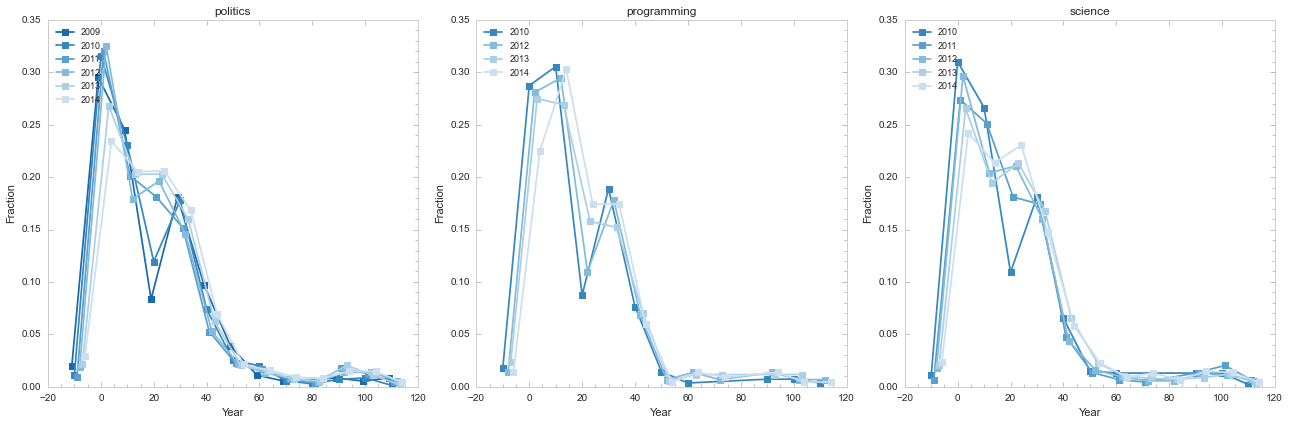

In [38]:
yearnorm = matplotlib.colors.Normalize(2007,2016)
setup(figsize=(18,6))
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit'),1):
    ax = setup(subplt=(1,3,k), title=subreddit, xlabel='Year', ylabel='Fraction')
#     pylab.axvspan(1990, 2020, color='0.5', alpha=0.3, zorder=-2),
    for i, (year, e) in enumerate(d.groupby('year')):
        pylab.plot(e['year'] - e['bin'], (e['count'])/np.sum(e['count']),  '-s',
                   color=pylab.cm.Blues_r(yearnorm(year)), label=year)
    legend(loc=2)
#     break
pylab.tight_layout()

In [40]:
# numbers = df[(df['nyear'] > 7)] # too much noise
numbers = df[ (df['ntotal'] > 100) & (df['nunique'] > 10) & (df['ngoodyear'] > 6)]


tmp = np.unique(numbers['subreddit'])
print tmp, len(tmp)
numbers

['AskReddit' 'Economics' 'Music' 'WTF' 'atheism' 'business' 'comics'
 'entertainment' 'funny' 'gadgets' 'gaming' 'geek' 'news' 'nsfw' 'offbeat'
 'pics' 'politics' 'programming' 'science' 'technology' 'videos'
 'worldnews'] 22


,Unnamed: 0,subreddit,year,bin,count,nauthor,ntotal,nunique,nyear,ngoodyear
518,518,worldnews,2014,1900,19,442,3262,13,7,7
519,519,worldnews,2014,1910,80,404,3262,13,7,7
...,...,...,...,...,...,...,...,...,...,...
125571,125571,AskReddit,2009,2010,154,2089,568,13,7,7
125572,125572,AskReddit,2009,2020,6,293,568,13,7,7


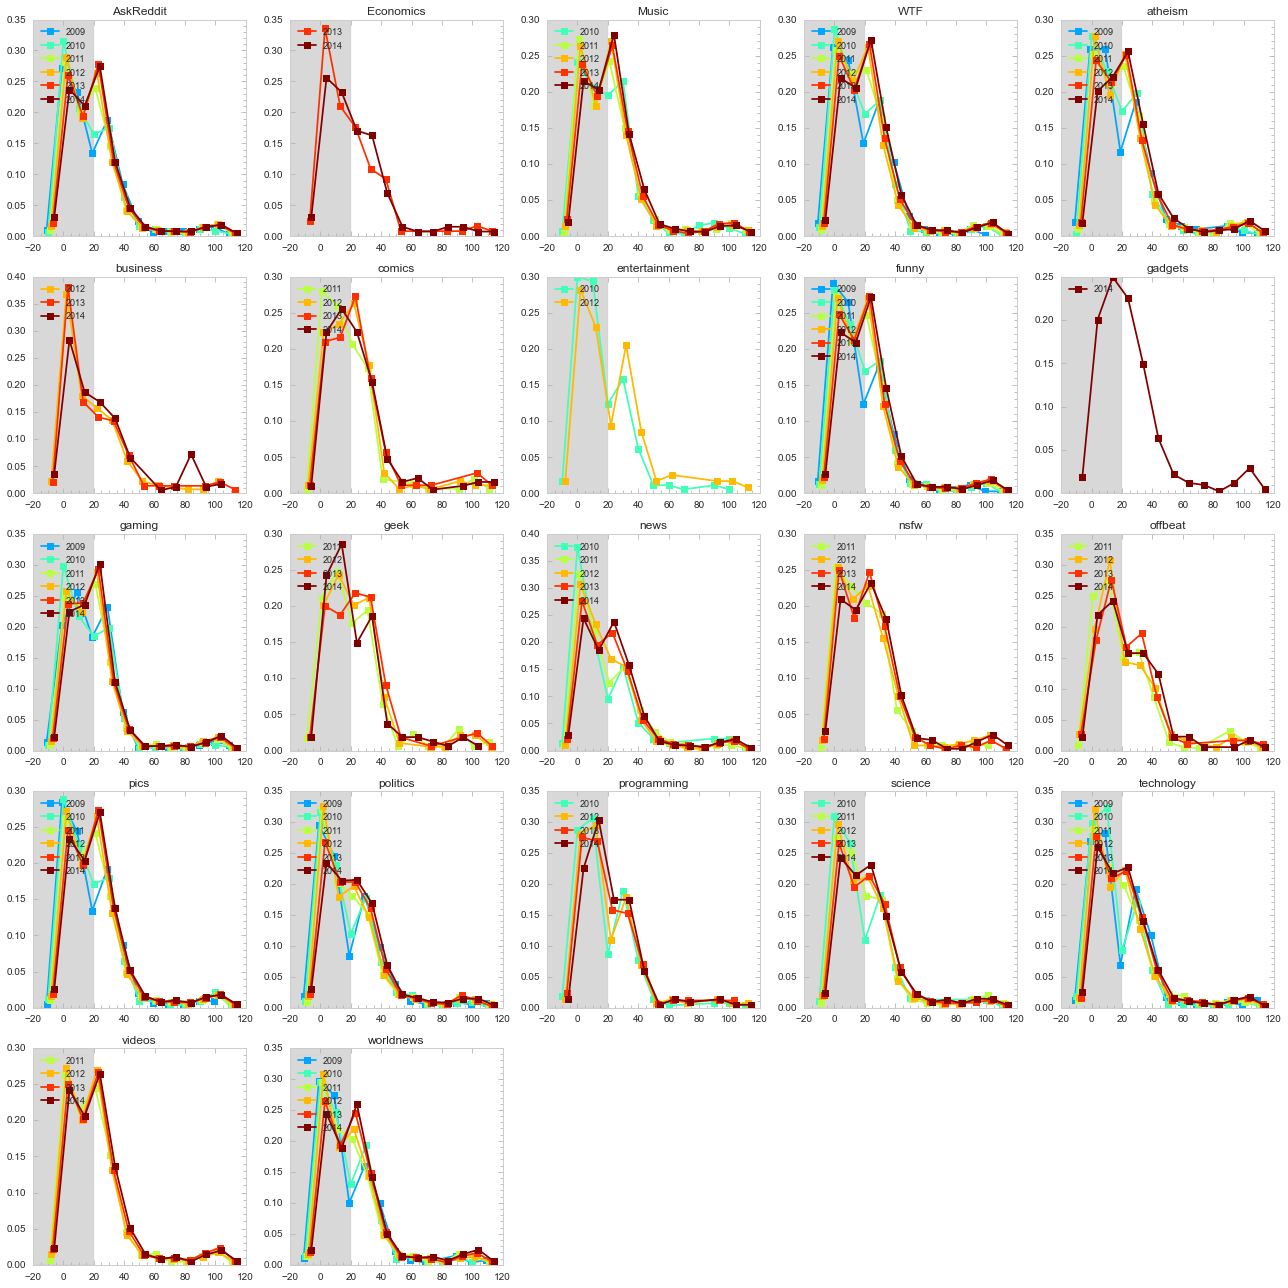

In [43]:
yearnorm = matplotlib.colors.Normalize(2007,2014)
setup(figsize=(18,18))
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit'),1):
    ax = setup(subplt=(5,5,k), title=subreddit)
    pylab.axvspan(-20, 20, color='0.5', alpha=0.3, zorder=-2),
    for i, (year, e) in enumerate(d.groupby('year')):
        pylab.plot(e['year'] - e['bin'], (e['count'])/np.sum(e['count']),  '-s',
                   color=pylab.cm.jet(yearnorm(year)), label=year)
    legend(loc=2)
#     break
pylab.tight_layout()